In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
dataset = pd.read_csv("Dataset/SOM/Credit_Card_Applications.csv")

In [19]:
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values

In [24]:
#Feature scaling
from sklearn.preprocessing import MinMaxScaler
#Normalization
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

In [30]:
#Training
from minisom import MiniSom
som = MiniSom(x=10,y=10,input_len=15,sigma=1.0,learning_rate=0.5)

In [37]:
som.random_weights_init(X)
som.train_random(data=X,num_iteration=100)

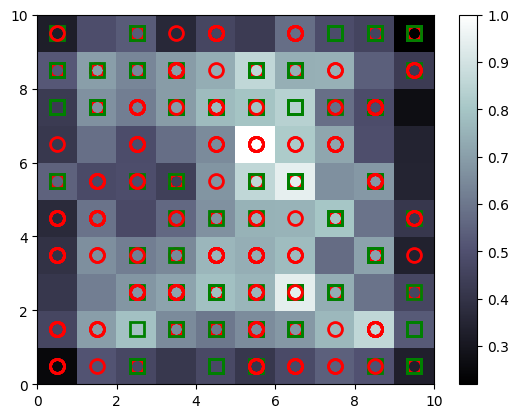

In [43]:
from pylab import bone, pcolor, colorbar, plot, show

bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[Y[i]],
         markeredgecolor = colors[Y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [44]:
"""## Finding the frauds"""

mappings = som.win_map(X)
frauds = np.concatenate((mappings[(1,1)], mappings[(4,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)

"""##Printing the Fraunch Clients"""

print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
0
0
0
0
0
0
0
0
0
0
0
0
0
0
